# Masterthesis documentation

## Introduction

The brain is a complex system that exhibits various subsystems on different spatial and temporal scales. These subsystems are recurrent networks, that is, very large clusters of neurons that repeatedly interact with each other. 
Currently, many studies (Zhao et al., 2008; Qun, 2009; Gao et al., 2014b; Ruizhen et al., 2017) have shown that when the brain is active, the neural activities of different regions are integrated in a synchronized way. 
The results of these studies show that the synchronization behavior of neuronal firing not only affects daily learning, brain memory, calculation, and motor control but can also be used to explain some neurological diseases such as epilepsy and Parkinson's disease.
Thus different synchronization states of neural networks seem to affect basic mechanisms for information integration and processing in functionality and dysfunctionality of the brain.(Li et al 2019)
To learn more about the relationship between synchronization conditions and functionality, we want to approximate biological neural systems by the use of articial neural networks.
Randomly connected networks are considered as a suitable model for biological neural systems (see, e.g., van Vreeswijk & Sompolinsky, 1996).
Typical approaches to model synchronous and asynchronous behavior of neural networks at the microscopic level use the framework of Reservoir Computing. 
To this end, a randomly connected pool of digital neurons, the reservoir, is created. It is excited with input data and trained to give dependent specific output. 
In this manner one can estimate a calculation performance of the artificial neural network and in the same time record it's condition of synchronicity.

Another question arises: Is it possible to predict changes in the quality of information processing on the basis of macroscopic variables of the reservoir?

The framework of Reservoir Computing, which is abbreviated as RC in the following, provides convenient tools to quantify computational power. Using this framework, we simulated “Quadratic Integrate and Fire neurons” in sparsely coupled reservoirs with linear readout functions. In this way, we received quantitative measures for the computation capacity.

Mean-Field models are able to directly link changes in the parameters of the network to macroscopic state variables like the mean firing activity, the mean phase and it's synchronicity inside the population. 

Bifurcation Analysis helped us to differentiate between different stable regimes and their phase transitions in the dynamics and synchronicity of the RC - network by walking through wide ranges of the network parameters in tiny steps while documenting according changes in the Mean-Field state variables.

Using these Methods, we were able to map regimes and phase transitions in the dynamics of the network, displayed by macroscopic state variables to measures for computational power, simulated in microscopic RC - networks.

We also found a macroscopic measure, which we call Perturbation Index, that shows a strong positive correlation with the computation measure. Using this, one can directly deviate the computational power of a network from the Mean-Field variables.

## Methods

### Reservoir Computing Framework

Reservoir computing is a framework for computation derived from recurrent neural network theory that maps input signals into higher dimensional computational spaces through the dynamics of a fixed, non-linear system called a reservoir.[1] The input signal is fed via randomly created input weights into the reservoir, which is treated as a "black box". A simple readout mechanism is trained to read the state of the reservoir and map it via linear regression to the desired output. This mapping will be used during the exploitation phase, to see if the network is able to reproduce desired output patterns for different test-input patterns.

We use spiking neural networks with spike frequency adaptation and "Quadratic Integrate and Fire Neurons", shortly QIF-Neurons. In the QIF-Neuron model, spikes are generated whenever the membrane potential 𝑣 in the neuron crosses some threshold 𝜃 from below. The moment of threshold crossing defines the firing time $ 𝑡(𝑓) $. The QIF Neuron is governed by the equation:

$ \tau \frac{d}{dt} v_{i}=v_{i}^2 + I_{i} $

where $\tau$ is the evolution time constant, $I_{i}$ is the input current and $v_{i}$ is the membrane potential of neuron $i$. It emits a spike, when the membrane potential reaches $v_{θ}$ upon which $v_{i}$ is reset to $v_{r}$. It is imperative that $v_{θ} > v_{r}$.

The form for the input current is

$ I_{i} = \eta_{i} + Js\tau + I(t) $

where the external input has a heterogeneous background current $\eta_{i}$ as well as a common time-varying compnent $I(t)$, and the recurrent input is the synaptic weight $J$ time the mean synaptic activation $s(t)$.

Which gives us the network equation for a network of all-to-all coupled neurons:

$ \tau \frac{d}{dt} v_{i}=v_{i}^2 + \eta_{i} + Js\tau + I(t) $

In our system, the external Input is connected to the reservoir neurons through an input matrix $W_{in}$.  

$I(t) = W_{in} * I_{ext}(t)$ 

while the recurrent input is realized with a reservoir-internal coupling matrix $C$ and a spikerate $r_{i}$ of every reservoir neuron.

$Js\tau = J*r_{i}*C*\tau$

$s_{i} = r_{i}*C$

Which concludes to the following network equation

$ \tau \frac{d}{dt} v_{i}=v_{i}^2 + \eta_{i} + J*r_{i}*C*\tau + W_{in} * I_{ext}(t) $.


The Input consists of an arbitrary number (mostly five) of randomly generated Poisson-Spike-Trains that flow into the reservoir neurons via differently weighted input channels. The output consists of the same number of channels. There is always one input channel active and the system is trained to identify the active channel by displaying the highest values, around one, in the corresponding output channel. 

In this work, we will combine the network of QIF Neurons with two short term adaptation mechanisms that have been shown to describe well the properties of biological neuronal networks in [2]:

The first mechanism is Synaptic Depression (SD). It means a multiplicative downscaling of the synaptic efficacy after firing. Neurobiologically, it represents mechanisms such as postsynaptic receptor desensitization or resource depletion at the synapse[3]. This adds a dependency of the postsynaptic activation $s_{i}$ on an adaptation variable $A_{i}$ pertaining to the ith postsynaptic neuron.

$s_{i} = (1 − A_{i})r_{i} *C$

while 

$ A_{i} = \alpha * \tau_{a}^{-2} * t * exp(\frac{-t}{\tau_{a}}) ** r_{i} $.

This expresses a convolution to the firerate $r$ with an alpha kernel with rate $\alpha$ and timescale $\tau_{a}$, and $**$ representing the convolution operation.
Synaptic depression affects only the susceptibility to synaptic input, which means that any changes to the network behavior caused by SD have to emerge from the interaction between the network units.

The second mechanism is called Spike-Frequency Adaptation (SFA). It effects the presynaptic activity instead of the postsynaptic efficacy (van Vreeswijk & Hansel, 2001; Gigante et al., 2007). Biologically it can be explained with homeostatic mechanisms p.e. spike-triggered balancing currents,that act at single neuron level (Guckenheimer et al., 1997; Benda & Herz, 2003). Adding an adaptation variable $B_{i}$, we receive the following evolution equation for the membrane potential of the single neuron:

$ \tau \frac{d}{dt} v_{i}=v_{i}^2 + \eta_{i} + Js\tau + I(t) -B_{i} $

Effectively, the slowly varying variable $B_{i}$ can be regarded as constant and thus be absorbed into $\eta_{i}$ in our case.



References:

.. [1] Tanaka, Gouhei; Yamane, Toshiyuki; Héroux, Jean Benoit; Nakane, Ryosho; Kanazawa, Naoki; Takeda, Seiji; Numata, Hidetoshi; Nakano, Daiju; Hirose, Akira (2019). "Recent advances in physical reservoir computing: A review". Neural Networks. 115: 100–123. doi:10.1016/j.neunet.2019.03.005. ISSN 0893-6080. PMID 30981085.

.. [2] R. Gast, H. Schmidt, T.R. Knösche (2020) A Mean-Field Description of Bursting Dynamics in Spiking Neural Networks with Short-Term Adaptation. Neural Computation (in press).

.. [3]Jones & Westbrook, 1996; Zucker & Regehr, 2002.

### Mean-Field Model 


It is beneficial to have a direct mathematical description of the macroscopic dynamics of the Reservoir Computing network. To this end, we use a Mean-Field Model which has been derived from a population of all-to-all coupled QIF neurons in [1]. It functions according to the following equations:

$\tau \dot r = \frac{\Delta}{\pi\tau} + 2 r v, $

$\tau \dot v = v^2 +\bar\eta + I(t) + J r \tau - (\pi r \tau)^2, $ 

where 𝑟 is the average firing rate and 𝑣 is the average membrane potential of the QIF population. 
The Model is governed by 4 parameters: 𝜏 is the population time constant, 𝜂¯ is the mean of a Lorenzian distribution over the neural excitability in the population, and Δ is the half-width at half maximum of the Lorenzian distribution over the neural excitability 𝐽, which is the strength of the recurrent coupling inside the population.

This mean-field model is an exact representation of the macroscopic firing rate and membrane potential dynamics of a spiking neural network consisting of QIF neurons with Lorentzian distributed background excitabilities. While the mean-field derivation is mathematically only valid for all-to-all coupled populations of infinite size, it has been shown that there is a close correspondence between the mean-field model and neural populations with sparse coupling and population sizes of a few thousand neurons [2]. In the same work, it has been demonstrated how to extend the model by adding synaptic dynamics or additional adaptation currents to the single cell network, that can be carried through the mean-field derivation performed in [1]. A QIF population with spike-frequency adaptation, as we use it in this work, is given by the following 4D system:

$ \tau \dot r = \frac{\Delta}{\pi\tau} + 2 r v, $

$ \tau \dot v = v^2 +\bar\eta + I(t) - A + J r \tau - (\pi r \tau)^2, $

$ \tau_A \dot A = B, $

$ \tau_A \dot B = \alpha r - 2 B - A $

where the evolution equations for 𝐴 and 𝐵 express a convolution of 𝑟 with an exponential kernel, with adaptation strength 𝛼 and time constant $𝜏_{𝐴}$.

References:

.. [1] E. Montbrió, D. Pazó, A. Roxin (2015) Macroscopic description for networks of spiking neurons. Physical Review X, 5:021028, https://doi.org/10.1103/PhysRevX.5.021028.

.. [2] R. Gast, H. Schmidt, T.R. Knösche (2020) A Mean-Field Description of Bursting Dynamics in Spiking Neural Networks with Short-Term Adaptation. Neural Computation (in press).

### Bifurcation Analysis

In this framework a system of ordinary differential equations is analyzed during parameter variation. It can happen that a slight variation in a parameter in dynamical systems has significant impact on the solution. Bifurcation anaylsis computes stability boundaries of equilibria and limit cycles in the parameter space and predicts qualitative changes in system’s behavior (bifurcations) occurring at equilibrium points. It does so by slightly varying parameters of interest, step by step, in the Mean-Field-Model. We found three different kinds of bifurcations related to the mean firerate of the system, each for different Mean-Field-Parameter sets, by varying the neural excitability J in small steps from zero to twenty. They are displayed in the graphic below for illustration purposes. A Hopf-Bifurcation refers to the development of periodic orbit solutions from stable equilibrium point, as the bifurcation parameter crosses a critical value. The cases in which the emerging nontrivial limit cycles are stable are called supercritical Hopf Bifurcations, whereas the cases in which these equilibria are unstable, are called subcritical. A fold bifurcation describes a collision and disappearance of two equilibria into one equilibrium in dynamical systems. To this end, and for all other parameter continuations reported in this article, we used the software package AUTO-07p (Doedel et al., 2007)


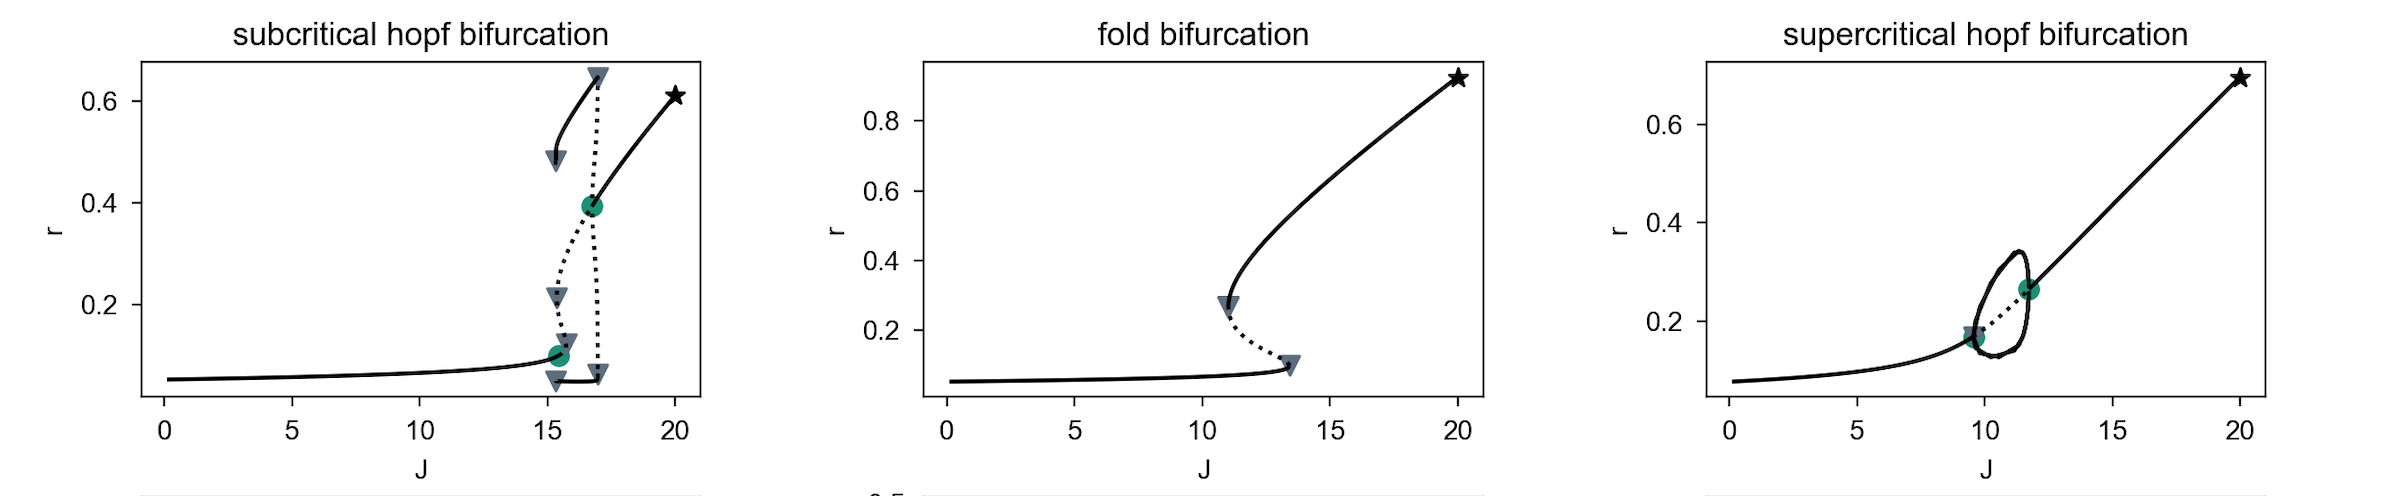


### Simulations

We simulated a network of eight hundred QIF Neurons with frequency adaptation for a duration of $1,250*10^6$ timesteps. The first $1,25*10^5$ timesteps were discarded as cutoff to ensure that network dynamics have overcome starting aberrations. Then, every tenth timestep, neuron states and output states were documented. 
Of the remaining $1,125*10^6$ timesteps, $0.75$ were used for training and the remaining $0.25$ were used for the testphase of the simulation.

A connectivity matrix with randomly distributed, sparse values between 0 and 1, with a connectivity of 0.2 and a spectral radius lower than one was used. The input matrix, which connects the input to the reservoir neurons, was also randomly created with a connectivity of 0.1.

The Input consisted of five channels of Poisson-Spike-Trains with five different input weights. The spike trains where randomly created, using a poisson distribution. 
Time was divided into ten equal input epochs of $1,125*10^5$ timesteps, where every input channel was consecutively distributing into the reservoir states for an equal amount of time. 

For training, the Output values where set to one in the channel that was related to the active input channel. In the remaining channels it was set to zero. During the testphase, a target output was created in the same manner, but it wasn't fed into the network.

During the test phase, an algorithm monitored if the output, given by the network, consisted with the target output. If from all output channels, the channel related to the active input channel exhibited the highest value, the algorithm would perceive the computation as successful for the current timestep. Integrating over the whole testphase, it would give a value between zero and one, corresponding to the ratio of right guesses of the network. This measure we call "winner-takes-it-all" measure, shortly WTA-Score.


Also, the Kuramoto Order Parameter is calculated out of the mean firerate and the mean membrane potential of the reservoir population with and connotating the complex conjugated of , at every stored timestep in the following manner. [1] 

$ Z=\frac{1-W^{*}}{1+W^{*}} $

It was also calculated from the Mean-Field model.
We simulated the RC-Network in fifty substeps, with a neural excitability J varying from 0 to 20 with the same three different parameter sets as mentioned in the section about bifurcation analysis

In this manner we retrieved the WTA-Score as a measure of computational capability of the network. for every substep.
Simultaneously we also the calculated the macroscopic state variables of the network via it's Mean-Field-Equations.
A short external Impulse in the shape of a step function with a length of 2ms was applied into the Mean-Field Equations of the System. The answer is always a damped oscillation in the magnitude of the Kuramoto Order Parameter.
We obtain the so called Perturbation Index by calculating the difference of the two first peaks of the oscillation. Thereby it represents a mixture of the strength of the impulse response and it's rate of damping.

References:

.. [1] E. Montbrió, D. Pazó, A. Roxin (2015) Macroscopic description for networks of spiking neurons. Physical Review X, 5:021028, https://doi.org/10.1103/PhysRevX.5.021028.

### Measures

#### WTA Score
As a measure for the computational ability of the network to solve the identification task, it gives a value between zero and one. It displays the ratio of right and wrong guesses of the network, while one means that it's always right and zero means the opposite, respectively.
It is important to say, that, as we have five possible answers, chancelevel for the WTA-Score would be 0.2, displaying a computational ability around zero for our network.

#### Kuramoto Order Parameter Z
The Kuramoto Order Parameter is a complex measure, it's magnitude can be interpreted as a measure of synchronisation inside the reservoir neuron population. If all neurons possess the identical membrane potential, the magnitude will be one, and if they are uniformly spread over the possible range of membrane potential, it will be zero.

#### Perturbation Index
The Perturbation Index is calculated by the difference of the two first peaks of the oscillation of the Mean-Field-Model after a short external Impulse. Thereby it represents a mixture of the strength of the impulse response and it's rate of damping.

## Results

We found three different kinds of bifurcations for three different sets of Parameters. The bifurcationdiagrams are listed in the first row of the diagram below. Simultaneously, by obtaining the WTA-Score and the Perturbation Index of the system, we found a positive correlation between them. This concerns especially the maximum of both measures and is made visible in the second row of the diagram below. In the third row, the correlation between WTA-Score and Perturbation Index are shown, approaching a linear dependency.

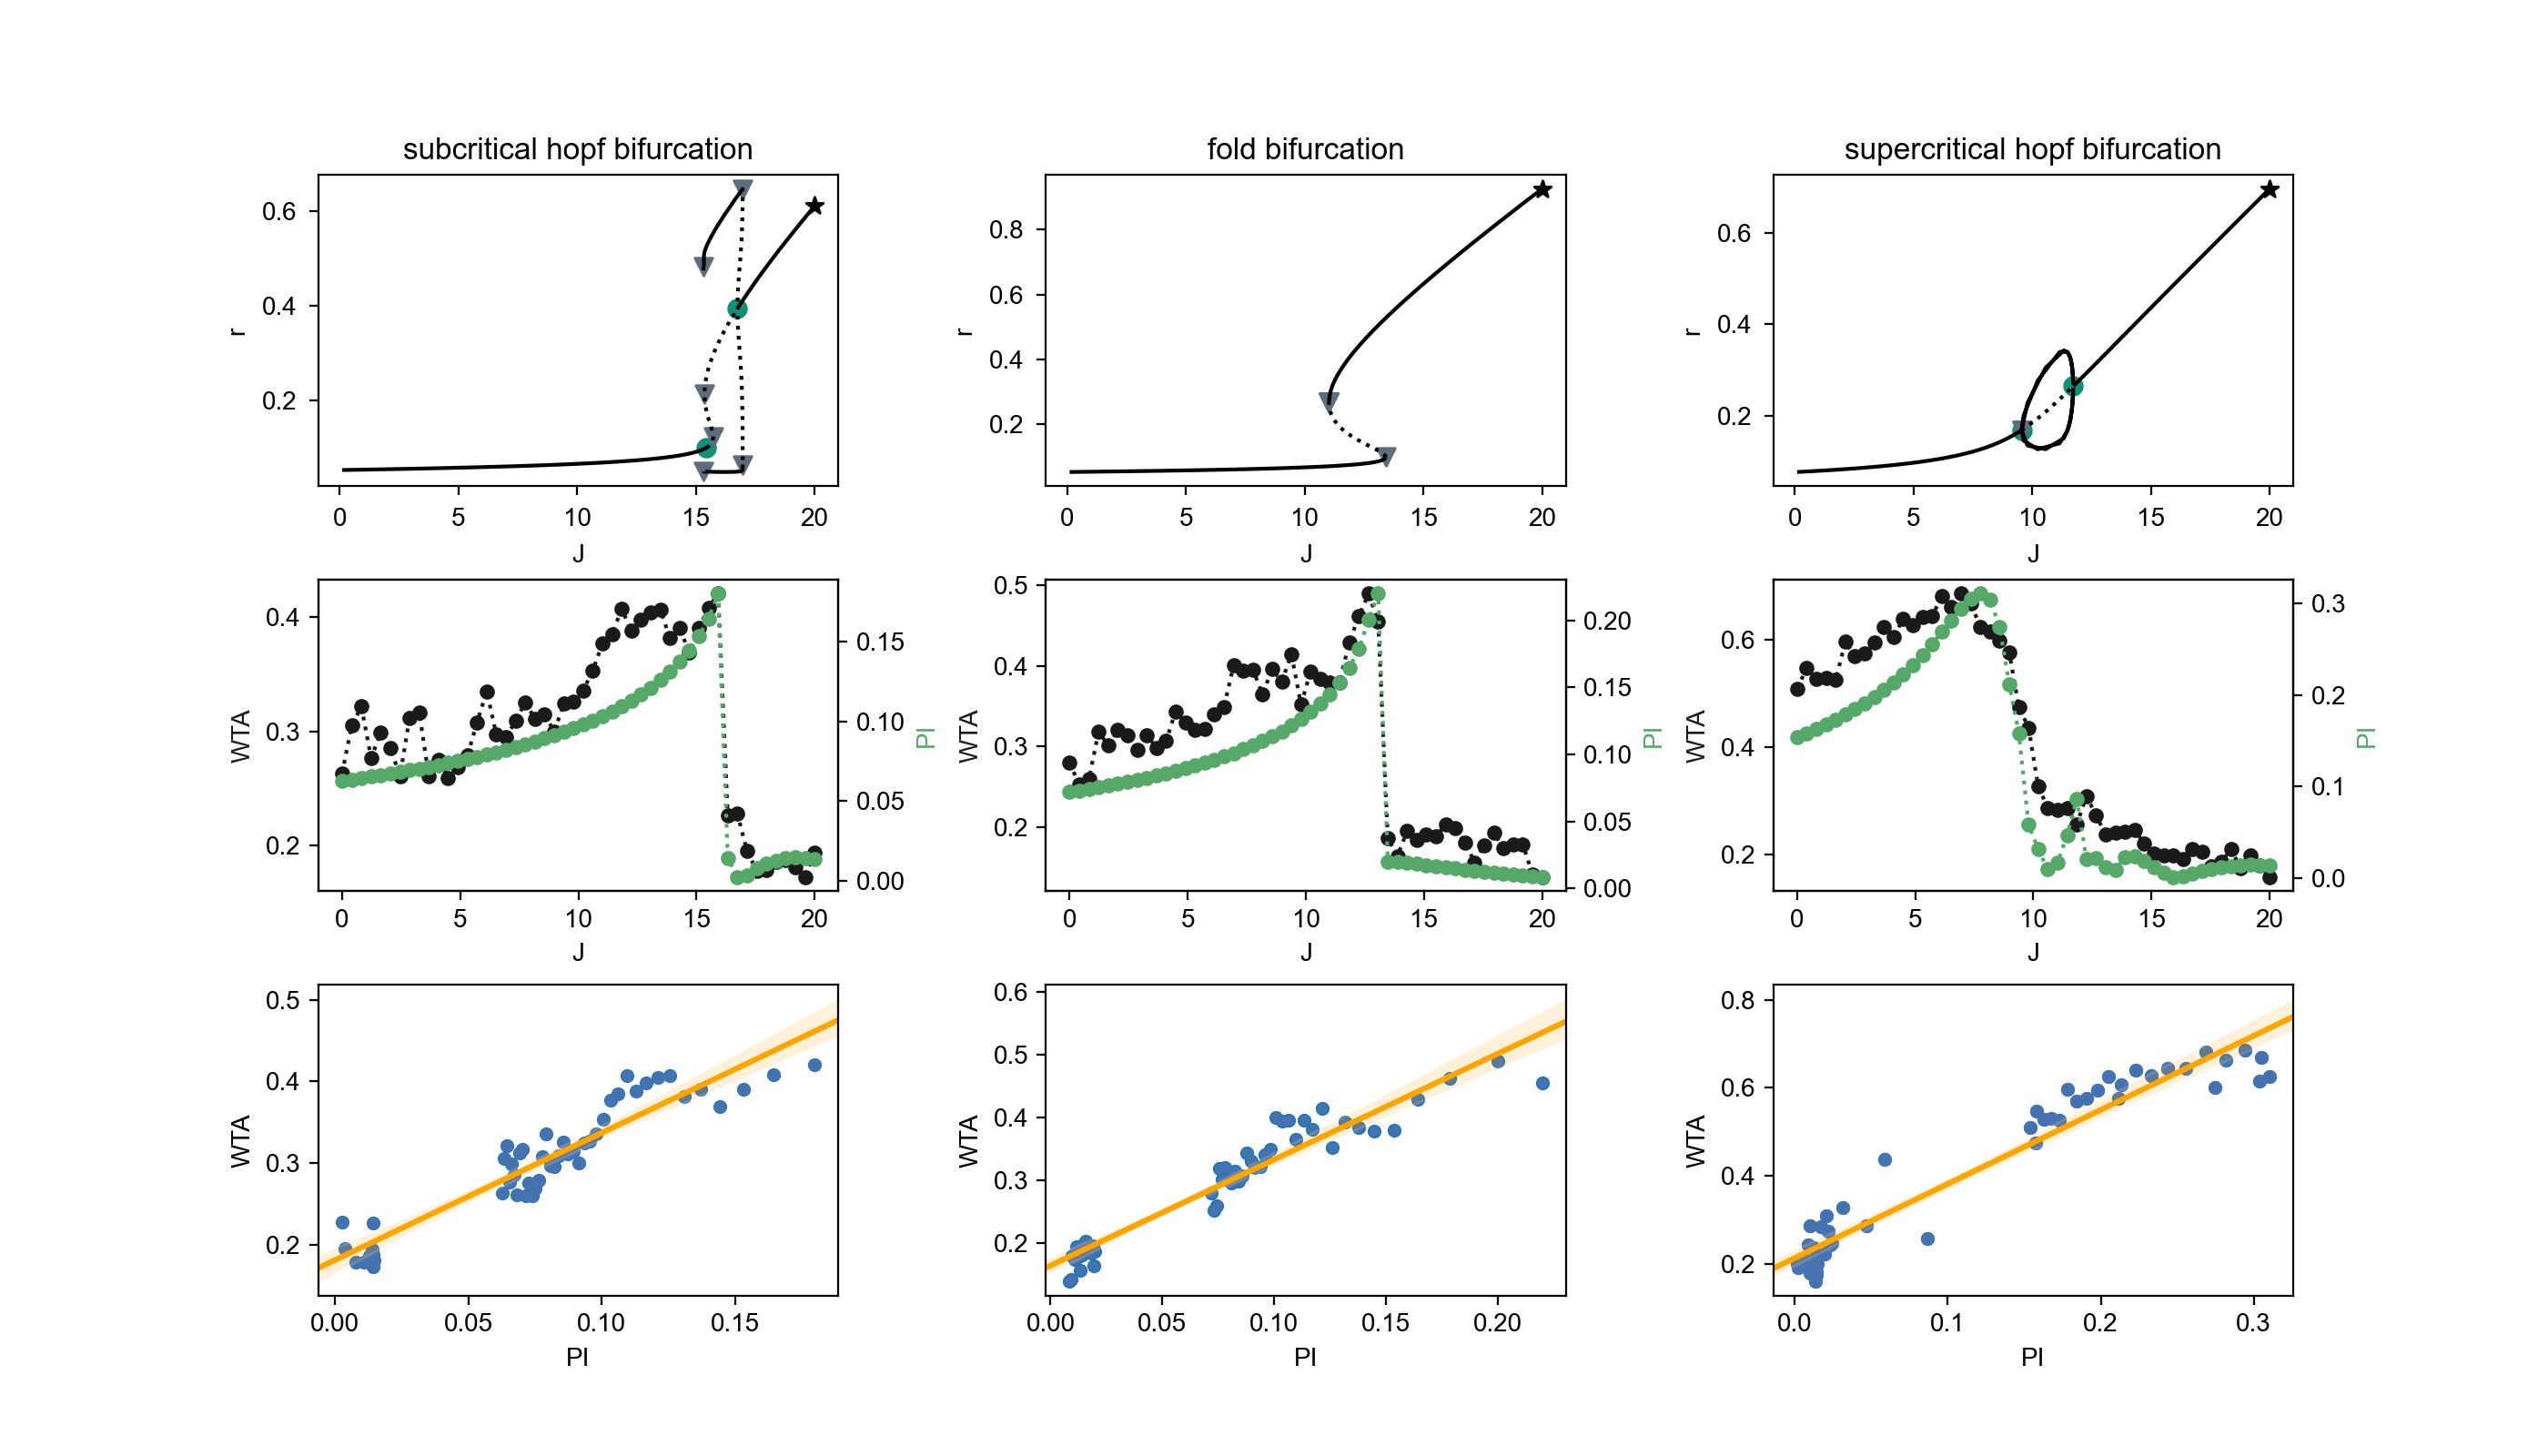

We also found a positive correlation between the firerates retrieved from the RC-Network Simulations and Mean-Field Equations. From this finding we follow, that the Mean-Field-Model approximated the RC-Network Dynamics well and that our findings are suitable. Below, the firerate retrieved from the Mean-Field Model and the RC-Simulation are shown in three different parametersets before, after and during the apparent bifurcation event. One can also see the short external impulse given into the Mean-Field-Model around timestep 12000 and the impulse response of the system, used to receive the Perturbation Index.

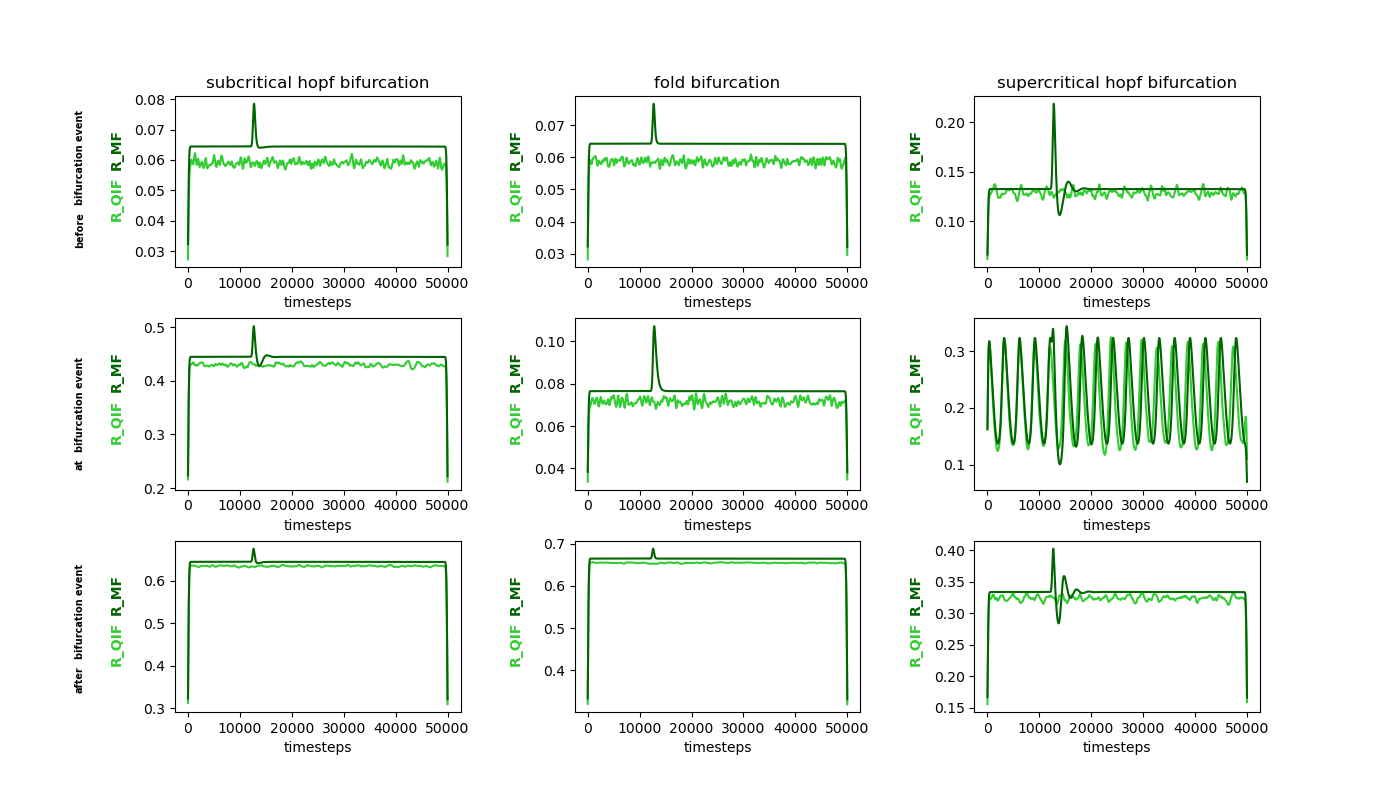

With these finding, we collected evidence, that leastwise for our setting, by calculating the Perturbation Index using the Mean-Field Model, one receives a measure, that estimates the computational performance of a RC-Network with adequate accuracy.